created: Tue Jan  5 08:20:07 2021

**Group 5 - Classification**

**V0 Innovation detection semi supervised**

@authors : Lilian Dulinge

This document is a first experience of semi supervised learning for predict if a document is consider as innovant or not. We define if a document is innovant or not for us with a function and we try to define if the others are (these don't classifie by the function). Else we return a document with all the features and the predictions for innovation.

In [ ]:
import pandas as pd 
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df: pd.DataFrame = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")

In [ ]:
def innovation(data_nb1 : pd.DataFrame, data_nb2 : pd.DataFrame, data_ratio1 : pd.DataFrame,
               data_ratio2 : pd.DataFrame, data_ratio3 : pd.DataFrame) -> list:
  """Documentation
  Parameters:
        data_nb1: First column of a dataframe who describe a number of words
        data_nb2: Second column of a dataframe who describe a number of words
        data_ratio1: linked column of data_nb1 who represents a ratio of word apparition
        data_ratio2: linked column of data_nb2 who represents a ratio of word apparition
        data_ratio3: other ratio who represents the ratio of key words by sentences

  Parameters Out:
        list: represents whether a document is innovative or not (i.e. yes = 1, no = 0, don't know = ?).
    """
  res: list = []
  seuil: float = 0.05
  for i in tqdm(range(len(data_nb1))):
    valeur = data_nb1[i]*data_ratio1[i] + 0.5*(data_nb2[i]*data_ratio2[i]) + 0.1*data_ratio3[i]
    if valeur > seuil :
      res.append(1)
    elif ((valeur < seuil) & (data_nb1[i] == 0) & (data_nb2[i] == 0)):
      res.append(0)
    else :
      res.append('?')
  return res

In [ ]:
# Visualization of a 2D point cloud with a PCA
def graph_2d(data: pd.DataFrame, prediction: list, dic_values: dict, transparency: float = 0.15):
    """Documentation
    Parameters:
        data: the data that will be show on the plot
        prediction: the prediction that will be used to make distinction bewteen the differents class on the plot
        dic_values: the signification of every values in the prediction
        transparency: the transparency of the points on the graph
    """
    components = data.shape[1]
    sc: StandardScaler = StandardScaler()
    X: ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=components)
    X: ndarray = pca.fit_transform(X)

    plt.title('Titre')
    for name_modal in dic_values:
        plt.scatter(X[prediction == dic_values[name_modal], 0], X[prediction ==
                                                                  dic_values[name_modal], 1], alpha=transparency, label=name_modal)
    plt.legend()

In [ ]:
# Visualization of a 3D point cloud with a PCA
def graph_3d(data: pd.DataFrame, prediction: list, axes=(0,1,2), opacity: int = 1):
    """Documentation
    Parameters:
        data: the data that will be show on the plot
        prediction: the prediction that will be used to make distinction bewteen the differents class on the plot
        axes: axes to plot
        opacity: the transparency of the points on the graph
    """
    components = data.shape[1]
    sc: StandardScaler = StandardScaler()
    X: ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=components)
    X: ndarray = pca.fit_transform(X)

    data_plot: pd.DataFrame = pd.DataFrame(X)
    data_plot["prediction"]: Series = prediction
    fig: Figure = px.scatter_3d(data_plot, x= 0, y= 1, z= 2, color='prediction', opacity=0.5)
    fig.show()

In [ ]:
df['innovation'] = innovation(df['Nb_key_words'],df['ratio_key_words'],df['Nb_key_words_title'],df['ratio_key_word_title'],df['ratio_key_sentences'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [ ]:
df['innovation'].value_counts()

?    6712
0    4610
1     824
Name: innovation, dtype: int64

In [ ]:
df[df['innovation'] == 1]

,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag,Nb_key_words,Nb_key_words_title,Nb_words,Nb_words_title,Nb_sentences,average_word_sentence,ratio_word_title_on_word,exclamation,interrogation,ratio_key_words,ratio_key_sentences,ratio_key_word_title,netloc.com,nb_word_path,content_postive_score,title_postive_score,content_negative_score,title_negative_score,content_polarity_score,title_polarity_score,content_subjectivity_score,title_subjectivity_score,innovation
27,27,"La journée thématique, qui aura lieu durant le...","<p style=""text-align: justify;""><strong>La jo...",31 mai 2017,fr,Journée Thématique FNCDG « Les services de san...,http://fncdg.com/journee-thematique-fncdg-les-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2017/05/pu...,NaN,NaN,3,1,124,13,3,41.333333,0.104839,0,0,0.024194,1.000000,0.076923,['.com'],11,0.000,0.000,0.000,0.0,0.000000,0.0,0.000000,0.0,1
32,32,"Créé pour et par les décideurs territoriaux, É...","<p style=""text-align: justify;"">Créé pour et p...",24 février 2017,fr,Lancement du réseau Étoile,http://fncdg.com/lancement-du-reseau-etoile/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2017/02/re...,NaN,NaN,4,1,229,4,10,22.900000,0.017467,0,0,0.017467,0.400000,0.250000,['.com'],4,0.000,0.000,0.007,0.0,0.044444,0.0,0.077778,0.0,1
70,70,La Convention-cadre relative à la mise à dispo...,"<p style=""text-align: justify;"">La Convention-...",8 février 2019,fr,Signature de la Convention entre la FNCDG et l...,http://fncdg.com/signature-de-la-convention-en...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2019/02/Si...,NaN,NaN,1,1,54,21,1,54.000000,0.388889,0,0,0.018519,1.000000,0.047619,['.com'],22,0.000,0.000,0.000,0.0,0.000000,0.0,0.000000,0.0,1
111,111,Le développement du numérique est un atout con...,"<div class=""teaser col-12""><p>Le développement...",04/12/2019,fr,RGPD : comment sécuriser les données de votre ...,/actualites/rgpd-comment-securiser-les-donnees...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,Kelly,"['#Anti-virus', '#Sauvegarde', '#RGPD']",16,0,747,14,31,24.096774,0.018742,1,5,0.021419,0.516129,0.000000,[],13,0.014,0.000,0.007,0.0,0.027083,0.0,0.420833,0.0,1
135,135,"Le 5 avril 2016, une note d’information relati...","<div class=""teaser col-12""><p>Le 5 avril 2016,...",08/12/2017 - A la une,fr,Solutions Cloud pour les collectivités locales...,/actualites/solutions-cloud-pour-les-collectiv...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,Jessy Loriaux,"['A la une', '#Cloud']",13,1,581,10,15,38.733333,0.017212,1,4,0.022375,0.866667,0.100000,[],12,0.004,0.175,0.013,0.0,0.066667,0.0,0.252381,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,12094,PROCÉDURES ET MÉTHODES SYNTHÈSE RÉCAPITULATIF ...,"<span class=""clearfix text-formatted field fie...",NaN,fr,La lutte contre les fraudes aux prestations so...,https://www.vie-publique.fr/rapport/276085-la-...,Vie Publique - Finances publiques,xpath_source,https://www.vie-publique.fr/finances-publiques,NaN,NaN,NaN,1,0,613,8,1,613.000000,0.013051,0,0,0.001631,1.000000,0.000000,"['.vie', '.fr']",10,0.007,0.000,0.000,0.0,0.050000,0.0,0.550000,0.0,1
12088,12127,@ La Banque Postale Finances locales : La Banq...,"<div class=""col-md-6"" gravityScore=""502.0"" gra...",NaN,fr,Finances locales : La Banque postale publie sa...,https://www.adcf.org/articles-finances-locales...,Association Communes France - Finances et fisc...,xpath_source,https://www.adcf.org/finances-et-fiscalite,NaN,NaN,NaN,5,1,1288,12,33,39.030303,0.009317,0,0,0.003882,0.151515,0.083333,"['.adcf', '.org']",13,0.013,0.000,0.010,0.0,0.066667,0.0,0.304762,0.0,1
12095,12134,@AdCF R

In [ ]:
df["art_url"][12138]

'https://www.amf.asso.fr/documents-vers-une-prorogation-mesures-transitoires-liees-la-crise-sanitaire-pour-la-reunion-instances-collectivites-territoriales-epci/40316'

In [ ]:
df : pd.DataFrame = df.sample(frac=1, random_state=15).reset_index(drop=True)

In [ ]:
df['index'] = df.index

In [ ]:
var_useful : pd.DataFrame = df[['art_id','Nb_key_words','Nb_key_words_title','ratio_key_words','ratio_key_word_title','innovation']]

In [ ]:
all = var_useful[var_useful['innovation'] != '?']
unlabeled = var_useful[var_useful['innovation'] == '?']

In [ ]:
print(str(len(df)),str(len(all)),str(len(unlabeled)))

12146 5434 6712


In [ ]:
trainData , testData = train_test_split(all,
                                        test_size=0.2)

In [ ]:
X_train : pd.DataFrame = trainData.drop('innovation', axis=1)
X_train = X_train.drop('art_id', axis=1)
y_train : pd.DataFrame = trainData.innovation

X_unlabeled : pd.DataFrame  = unlabeled.drop('innovation', axis=1)
X_unlabeled = X_unlabeled.drop('art_id', axis=1)

X_test : pd.DataFrame = testData.drop('innovation', axis=1)
X_test = X_test.drop('art_id', axis=1)
y_test : pd.DataFrame = testData.innovation

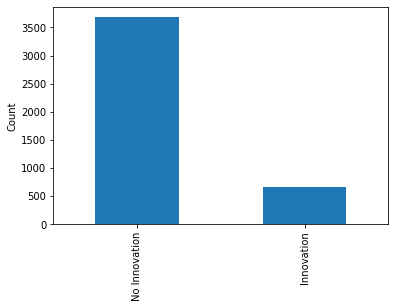

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Innovation', 'Innovation'])
plt.ylabel('Count');

In [ ]:
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

Train f1 Score: 1.0
Test f1 Score: 1.0


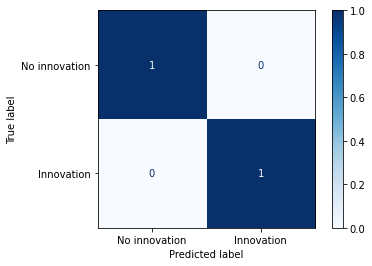

In [ ]:
# Logistic Regression Classifier

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)
y_hat_test : np.ndarray = clf.predict(X_test)
y_hat_train : np.ndarray = clf.predict(X_train)

train_f1 : float = f1_score(y_train, y_hat_train)
test_f1 : float = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No innovation', 'Innovation']);

# le beau dammier

In [ ]:
# Generate probabilities for each prediction

clf.predict_proba(X_test)

array([[0.99829149, 0.00170851],
       [0.99829149, 0.00170851],
       [0.99125578, 0.00874422],
       ...,
       [0.99829149, 0.00170851],
       [0.99829149, 0.00170851],
       [0.05395934, 0.94604066]])

In [ ]:
# Initiate iteration counter
iterations : int = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s : list = []
test_f1s : list = []
pseudo_labels : list = []

# Assign value to initiate while loop
high_prob : list = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train : np.ndarray = clf.predict(X_train)
    y_hat_test : np.ndarray = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 : int = f1_score(y_train, y_hat_train)
    test_f1 : int = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    if (len(X_unlabeled) > 0):
      # Generate predictions and probabilities for unlabeled data
      print(f"Now predicting labels for unlabeled data...")

      pred_probs : np.ndarray = clf.predict_proba(X_unlabeled)
      preds : np.ndarray = clf.predict(X_unlabeled)
      prob_0 : list = pred_probs[:,0]
      prob_1 : list = pred_probs[:,1]

      # Store predictions and probabilities in dataframe
      df_pred_prob : pd.DataFrame = pd.DataFrame([])
      df_pred_prob['preds'] = preds
      df_pred_prob['prob_0'] = prob_0
      df_pred_prob['prob_1'] = prob_1
      df_pred_prob.index = X_unlabeled.index
    
      # Separate predictions with > 99% probability
      high_prob : pd.DataFrame = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
      print(f"{len(high_prob)} high-probability predictions added to training data.")
    
      pseudo_labels.append(len(high_prob))

      # Add pseudo-labeled data to training data
      X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
      y_train = pd.concat([y_train, high_prob.preds])      
    
      # Drop pseudo-labeled instances from unlabeled data
      X_unlabeled = X_unlabeled.drop(index=high_prob.index)
      print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
      # Update iteration counter
      iterations += 1
    else :
      high_prob = []
      print(f'end of process.')

Iteration 0
Train f1: 1.0
Test f1: 1.0
Now predicting labels for unlabeled data...
5084 high-probability predictions added to training data.
1628 unlabeled instances remaining.

Iteration 1
Train f1: 1.0
Test f1: 1.0
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
1628 unlabeled instances remaining.



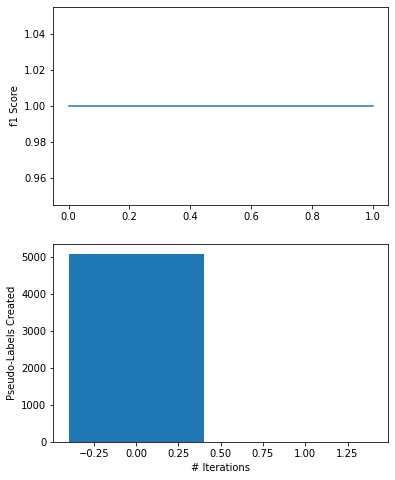

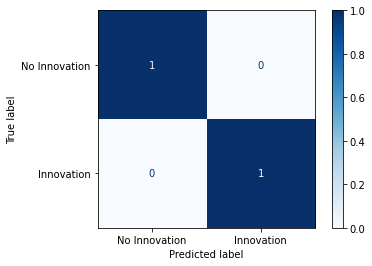

In [ ]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Innovation', 'Innovation']);

In [ ]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_hat_train = knn.predict(X_train)
    y_hat_test = knn.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    if (len(X_unlabeled) > 0):
      # Generate predictions and probabilities for unlabeled data
      print(f"Now predicting labels for unlabeled data...")

      pred_probs = knn.predict_proba(X_unlabeled)
      preds = knn.predict(X_unlabeled)
      prob_0 = pred_probs[:,0]
      prob_1 = pred_probs[:,1]

      # Store predictions and probabilities in dataframe
      df_pred_prob = pd.DataFrame([])
      df_pred_prob['preds'] = preds
      df_pred_prob['prob_0'] = prob_0
      df_pred_prob['prob_1'] = prob_1
      df_pred_prob.index = X_unlabeled.index
    
      # Separate predictions with > 99% probability
      high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
      print(f"{len(high_prob)} high-probability predictions added to training data.")
    
      pseudo_labels.append(len(high_prob))

      # Add pseudo-labeled data to training data
      X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
      y_train = pd.concat([y_train, high_prob.preds])      
    
      # Drop pseudo-labeled instances from unlabeled data
      X_unlabeled = X_unlabeled.drop(index=high_prob.index)
      print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
      # Update iteration counter
      iterations += 1
    else :
      high_prob = []
      print(f'end of process.')

Iteration 0
Train f1: 1.0
Test f1: 1.0
Now predicting labels for unlabeled data...
1628 high-probability predictions added to training data.
0 unlabeled instances remaining.

Iteration 1
Train f1: 1.0
Test f1: 1.0
end of process.


In [ ]:
X_test['innovation'] = y_test
test_end = X_test 

In [ ]:
X_train['innovation'] = y_train
train_end = X_train

In [ ]:
final = pd.concat([train_end,test_end])

In [ ]:
final['index'] = final.index

In [ ]:
df_final = pd.merge(left=df, right=final, left_on='index', right_on='index')

In [ ]:
df_final=df_final.drop(columns=['index','innovation_x','Nb_key_words_y','Nb_key_words_title_y',
                                'ratio_key_words_y','ratio_key_word_title_y'])

In [ ]:
df_final = df_final.rename(columns = {'Nb_key_words_x': 'Nb_key_words', 'Nb_key_words_title_x': 'Nb_key_words_title',
                           'ratio_key_words_x' : 'ratio_key_words', 'ratio_key_word_title_x' : 'ratio_key_word_title',
                           'innovation_y' : 'innovation'})

In [ ]:
df_final.to_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_V0.json")

In [ ]:
data_acp = df_final[['Nb_key_words','Nb_key_words_title','ratio_key_words','ratio_key_word_title']]
y = df_final['innovation']
dic_values: dict = {"Innovation": 1, "No Innovation": 0}

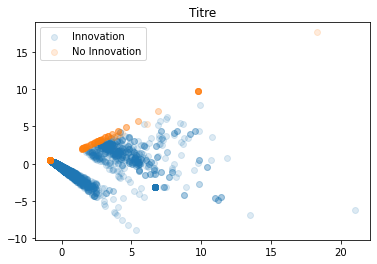

In [ ]:
graph_2d(data_acp, y, dic_values)
# graph 2D for see predictions

In [ ]:
graph_3d(data_acp, y, dic_values)
# graph 3D for see predictions